In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix,roc_auc_score,roc_curve


In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
dft=pd.read_csv(r"C:\Users\DSCKK2\OneDrive - CELANESE CORPORATION\Python\titanic_dataset.csv")
dft

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
dft.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
round(dft.isna().sum()/len(dft)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [7]:
dft.drop('Cabin', inplace=True, axis=1)

In [8]:
dft

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
dft.drop(['PassengerId','Ticket','Name','Fare'], inplace=True, axis=1)

In [10]:
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [11]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        return (dft[dft['Pclass']==Pclass]['Age'].mean())
    else:
        return Age

In [12]:
dft['Embarked'].fillna(dft['Embarked'].mode()[0],inplace=True)

In [13]:
dft.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [14]:
dft['Age']=dft[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
dft.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [16]:
dft[dft['Embarked']=='C']

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
1,1,1,female,38.00000,1,0,C
9,1,2,female,14.00000,1,0,C
19,1,3,female,25.14062,0,0,C
26,0,3,male,25.14062,0,0,C
30,0,1,male,40.00000,0,0,C
...,...,...,...,...,...,...,...
866,1,2,female,27.00000,1,0,C
874,1,2,female,28.00000,1,0,C
875,1,3,female,15.00000,0,0,C
879,1,1,female,56.00000,0,1,C


In [17]:
dft['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

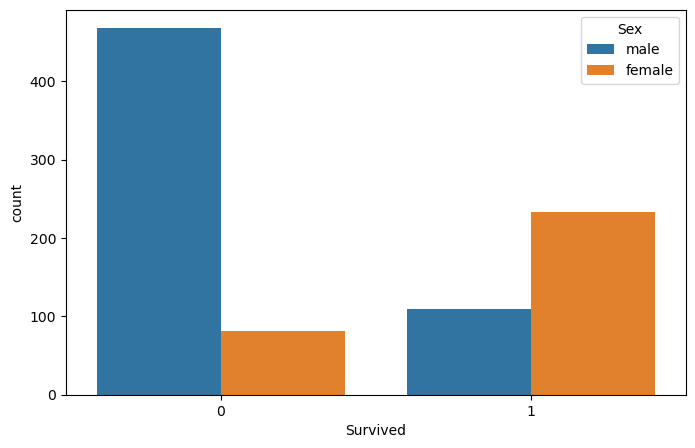

In [18]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived',hue='Sex', data=dft)
plt.show()

In [19]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [20]:
label=LabelEncoder()

In [21]:
dft['Pclass']=label.fit_transform(dft['Pclass'])


In [22]:
dft['Sex']=label.fit_transform(dft['Sex'])
dft['Embarked']=label.fit_transform(dft['Embarked'])

In [23]:
dft.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,2,1,22.00000,1,0,2
1,1,0,0,38.00000,1,0,0
2,1,2,0,26.00000,0,0,2
3,1,0,0,35.00000,1,0,2
4,0,2,1,35.00000,0,0,2
5,0,2,1,25.14062,0,0,1
6,0,0,1,54.00000,0,0,2
7,0,2,1,2.00000,3,1,2
8,1,2,0,27.00000,0,2,2
9,1,1,0,14.00000,1,0,0


In [24]:
x=dft.drop('Survived',axis=1)

In [25]:
y=dft['Survived']

In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20, random_state=45)

In [28]:
train_x.shape,test_x.shape

((712, 6), (179, 6))

In [29]:
log=LogisticRegression()

In [30]:
log.fit(train_x,train_y)

LogisticRegression()

In [31]:
pred=log.predict(test_x)

In [32]:
pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [33]:
acc=accuracy_score(test_y,pred)

In [40]:
print(acc)

0.8435754189944135


In [35]:
cm=confusion_matrix(test_y,pred)

In [36]:
print(cm)

[[102  15]
 [ 13  49]]


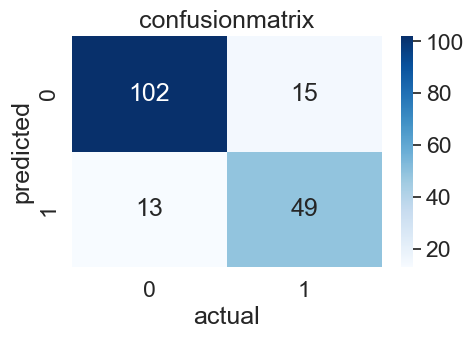

In [38]:
plt.subplots(figsize=(5,3))
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('confusionmatrix')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()